In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Датасет
- PrincessName – Имя принцессы

- FirstMovieTitle – Название первого фильма/шоу с этой принцессой

- FirstMovieYear – Год выхода первого фильма

- MovieRuntimeMinutes – Продолжительность фильма в минутах

- NumberOfSongs – Количество песен в фильме

- HasSoloSong – Есть ли сольная песня у принцессы (Yes/No)

- HasDuet – Есть ли дуэт (Yes/No)

- HairColor – Цвет волос принцессы

- EyeColor – Цвет глаз принцессы

- OutfitPrimaryColor – Основной цвет наряда

- OutfitStyleEra – Эпоха/стиль наряда

- IsRoyalByBirth – Принцесса королевской крови (Yes/No)

- HasAnimalSidekick – Есть ли животный спутник (Yes/No)

- SidekickType – Тип спутника (например, дракон, птица)

- HasMagicalPowers – Есть ли магические способности (Yes/No)

- MagicType – Тип магии

- MainSetting – Основное место действия фильма

- IsBasedOnRealStory – Фильм основан на реальной истории (Yes/No)

- CulturalOrigin – Культурное происхождение персонажа/истории

- SpeaksToAnimals – Принцесса разговаривает с животными (Yes/No)

- FightsVillainDirectly – Прямое противостояние злодею (Yes/No)

- RomanticSubplot – Есть романтическая линия (Yes/No)

- MarriedByEnd – Принцесса выходит замуж к концу (Yes/No)

- VillainName – Имя злодея

- VillainType – Тип злодея (например, ведьма, мачеха)

- IMDB_Rating – Рейтинг IMDb

- RottenTomatoesScore – Рейтинг Rotten Tomatoes

- BoxOfficeMillions – Сборы в миллионах долларов

- AvgScreenTimeMinutes – Среднее время на экране принцессы

- NumMerchItemsOnAmazon – Количество товаров на Amazon

- GoogleSearchIndex2024 – Популярность в Google в 2024 году

- InstagramFanPages – Количество фан-страниц в Instagram

- TikTokHashtagViewsMillions – Количество просмотров хэштегов в TikTok

- Top3Hashtags – Топ 3 хэштега в TikTok

- IsIconic – Иконичность персонажа (Yes/No)

- PopularityScore – Общий балл популярности (0–100)

In [82]:
df = pd.read_csv('/disney_princess_popularity_dataset.csv')
df.head()

,PrincessName,FirstMovieTitle,FirstMovieYear,MovieRuntimeMinutes,NumberOfSongs,HasSoloSong,HasDuet,HairColor,EyeColor,OutfitPrimaryColor,...,RottenTomatoesScore,BoxOfficeMillions,AvgScreenTimeMinutes,NumMerchItemsOnAmazon,GoogleSearchIndex2024,InstagramFanPages,TikTokHashtagViewsMillions,Top3Hashtags,IsIconic,PopularityScore
0,Pocahontas,Pocahontas's Adventure,1977,85,4,No,Yes,Brown,Green,Pink,...,88,661,25,2524,68,298,481,#TeamPocahontas #LovePocahontas #PocahontasFor...,Yes,88
1,Mulan,Mulan's Adventure,1995,85,1,Yes,Yes,Blonde,Brown,Purple,...,91,688,52,4202,49,133,619,#TeamMulan #LoveMulan #MulanForever,Yes,78
2,Raya,Raya's Adventure,1989,110,4,No,No,Blonde,Hazel,Pink,...,76,790,54,525,68,129,230,#TeamRaya #LoveRaya #RayaForever,No,53
3,Anna,Anna's Adventure,1940,78,1,No,No,Brown,Grey,Green,...,70,820,42,1951,73,138,697,#TeamAnna #LoveAnna #AnnaForever,Yes,84
4,Mulan,Mulan's Adventure,1943,103,7,No,Yes,White,Brown,Green,...,86,996,55,3958,34,155,200,#TeamMulan #LoveMulan #MulanForever,Yes,71


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PrincessName                300 non-null    object 
 1   FirstMovieTitle             300 non-null    object 
 2   FirstMovieYear              300 non-null    int64  
 3   MovieRuntimeMinutes         300 non-null    int64  
 4   NumberOfSongs               300 non-null    int64  
 5   HasSoloSong                 300 non-null    object 
 6   HasDuet                     300 non-null    object 
 7   HairColor                   300 non-null    object 
 8   EyeColor                    300 non-null    object 
 9   OutfitPrimaryColor          300 non-null    object 
 10  OutfitStyleEra              300 non-null    object 
 11  IsRoyalByBirth              300 non-null    object 
 12  HasAnimalSidekick           300 non-null    object 
 13  SidekickType                230 non

In [84]:
binary_cols = ['HasSoloSong', 'HasDuet', 'IsRoyalByBirth', 'HasAnimalSidekick',
               'HasMagicalPowers', 'SpeaksToAnimals', 'FightsVillainDirectly',
               'RomanticSubplot', 'MarriedByEnd', 'IsIconic']

for col in binary_cols:
    df[col] = df[col].astype(str)

    df[col] = df[col].str.strip().str.replace(u'\xa0', '', regex=False).str.lower()

    df[col] = df[col].map({'yes':1, 'no':0})


df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['RottenTomatoesScore'] = pd.to_numeric(df['RottenTomatoesScore'], errors='coerce')

##1. Гистограмма продолжительности фильмов

Показывает, какие продолжительности фильмов наименее/наиболее часты. X = минуты, Y = количество фильмов.

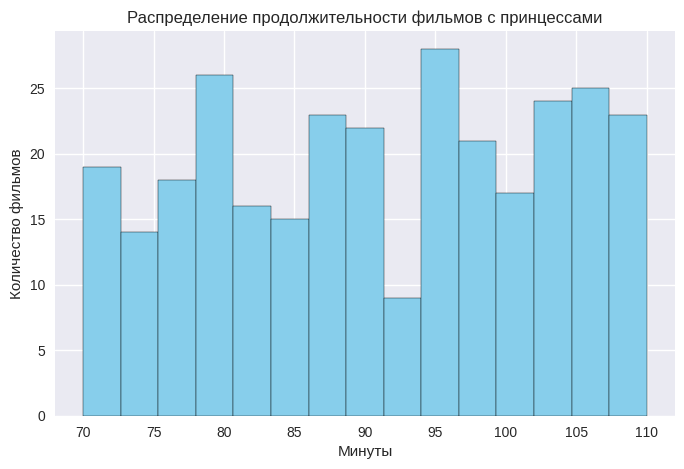

In [93]:
plt.figure(figsize=(8,5))
plt.hist(df['MovieRuntimeMinutes'], bins=15, color='skyblue', edgecolor='black')
plt.title('Распределение продолжительности фильмов с принцессами')
plt.xlabel('Минуты')
plt.ylabel('Количество фильмов')
plt.show()

##2. Boxplot IMDb рейтинга по наличию магии
Позволяет сравнить медиану и разброс рейтингов.
Видно, как наличие магии влияет на восприятие фильма зрителями. Ось X = бинарный признак, ось Y = числовой рейтинг.

/tmp/ipython-input-2576400915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HasMagicalPowers', y='IMDB_Rating', data=df, palette='muted')


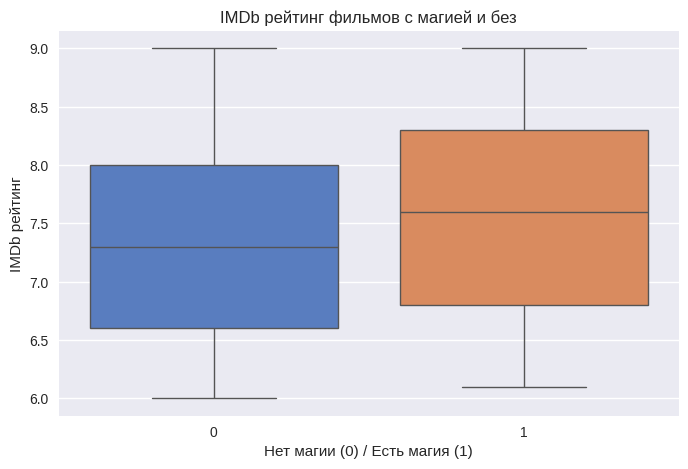

In [189]:
plt.figure(figsize=(8,5))
sns.boxplot(x='HasMagicalPowers', y='IMDB_Rating', data=df, palette='muted')
plt.title('IMDb рейтинг фильмов с магией и без')
plt.xlabel('Нет магии (0) / Есть магия (1)')
plt.ylabel('IMDb рейтинг')
plt.show()

##3. Countplot по цвету волос
Показывает, какие цвета волос преобладают среди принцесс. X = категориальный признак (цвет волос), Y = количество персонажей.

/tmp/ipython-input-3433216797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HairColor', data=df, order=hair_order, palette=hair_colors)


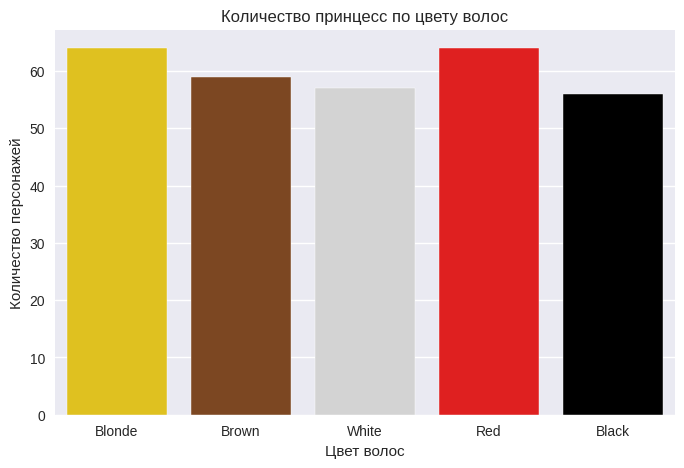

In [107]:
plt.figure(figsize=(8,5))
hair_order = ['Blonde', 'Brown', 'White', 'Red', 'Black']
hair_colors = {'Blonde':'gold', 'Brown':'saddlebrown', 'White':'lightgrey', 'Red':'red', 'Black':'black'}

sns.countplot(x='HairColor', data=df, order=hair_order, palette=hair_colors)
plt.title('Количество принцесс по цвету волос')
plt.xlabel('Цвет волос')
plt.ylabel('Количество персонажей')
plt.show()

##4. Pie chart по типу злодея
Показывает долю каждого типа злодея. Можно понять, какие архетипы злодеев встречаются чаще.

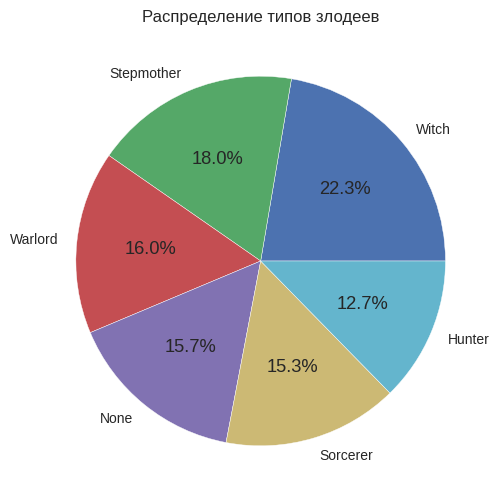

In [188]:
villain_counts = df['VillainType'].fillna('None').value_counts()
plt.figure(figsize=(6,6))
plt.pie(villain_counts, labels=villain_counts.index, autopct='%1.1f%%')
plt.title('Распределение типов злодеев')
plt.show()

##5. Violin plot Rotten Tomatoes по эпохе наряда
Показывает распределение рейтингов по разным стилям наряда. Видно медиану, разброс и плотность значений для каждой эпохи.

/tmp/ipython-input-1427883916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='OutfitStyleEra', y='RottenTomatoesScore', data=df, palette='muted')


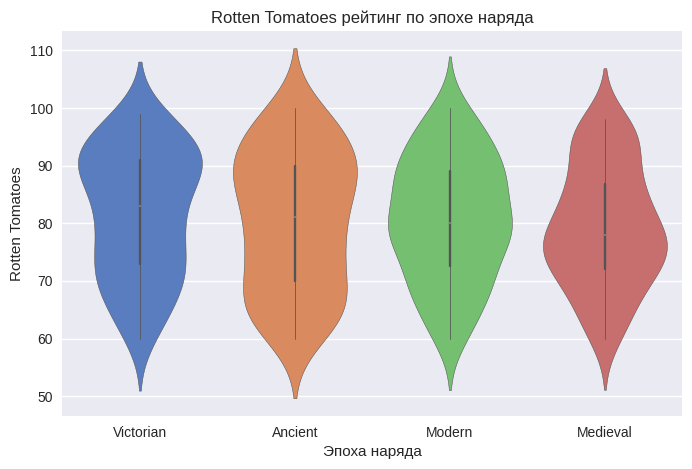

In [103]:
plt.figure(figsize=(8,5))
sns.violinplot(x='OutfitStyleEra', y='RottenTomatoesScore', data=df, palette='muted')
plt.title('Rotten Tomatoes рейтинг по эпохе наряда')
plt.xlabel('Эпоха наряда')
plt.ylabel('Rotten Tomatoes')
plt.show()

##6. Countplot культурного происхождения принцесс
Категориальный график показывает, какие культуры чаще представлены. X = культура, Y = количество персонажей.

/tmp/ipython-input-2276865734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CulturalOrigin', data=df, palette='muted', order=df['CulturalOrigin'].value_counts().index)


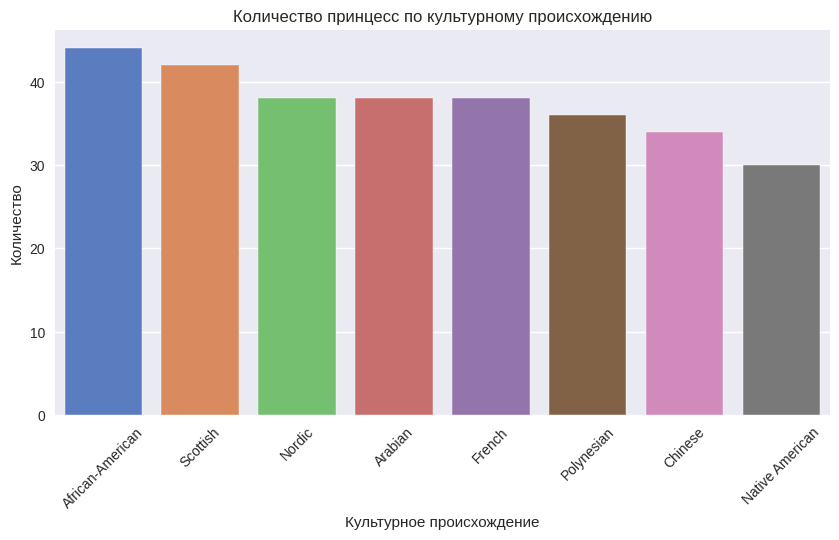

In [186]:
plt.figure(figsize=(10,5))
sns.countplot(x='CulturalOrigin', data=df, palette='muted', order=df['CulturalOrigin'].value_counts().index)
plt.title('Количество принцесс по культурному происхождению')
plt.xlabel('Культурное происхождение')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

##7. Scatter plot TikTok просмотры vs Popularity
Показывает распределение популярных фильмов по просмотрам и рейтингу.
X - количество просмотров хэштегов фильма на TikTok (в миллионах), Y - балл популярности.

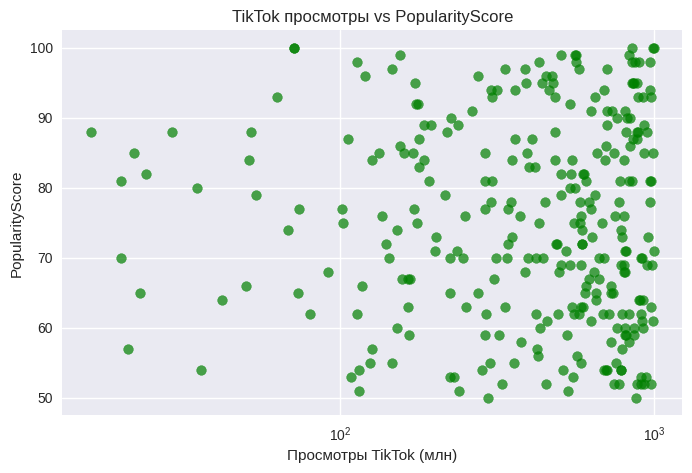

In [145]:
df_tiktok = df[df['TikTokHashtagViewsMillions']>10] #берем только более 10 млн для наглядности
plt.figure(figsize=(8,5))
plt.scatter(df_tiktok['TikTokHashtagViewsMillions'], df_tiktok['PopularityScore'], alpha=0.7, color='green')
plt.xscale('log')
plt.title('TikTok просмотры vs PopularityScore')
plt.xlabel('Просмотры TikTok (млн)')
plt.ylabel('PopularityScore')
plt.show()

##8. Line plot популярности по годам
Линейный график показывает тренд изменения популярности с годами. X - год, Y - средний балл популярности.

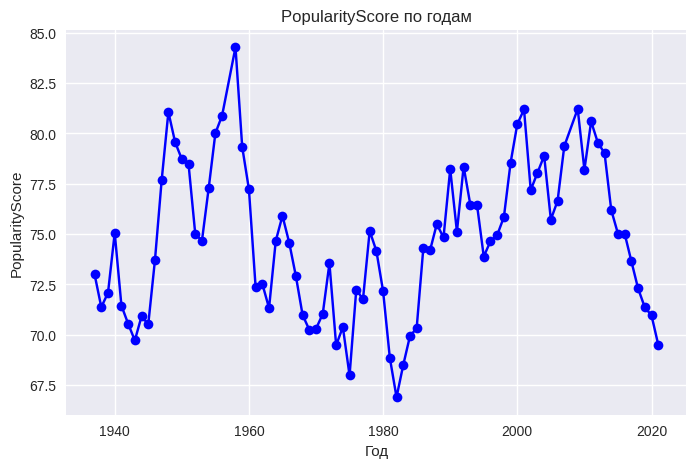

In [154]:
plt.figure(figsize=(8,5))
pop_by_year = df.groupby('FirstMovieYear')['PopularityScore'].mean()
pop_by_year_smooth = pop_by_year.rolling(window=5, min_periods=1).mean()
plt.plot(pop_by_year_smooth.index, pop_by_year_smooth.values, marker='o', color='blue')
plt.title('PopularityScore по годам')
plt.xlabel('Год')
plt.ylabel('PopularityScore')
plt.show()


##9. Pie chart по животным-спутникам принцесс
Показывает процентное распределение всех принцесс по типу спутника + отдельная категория “Без спутника”

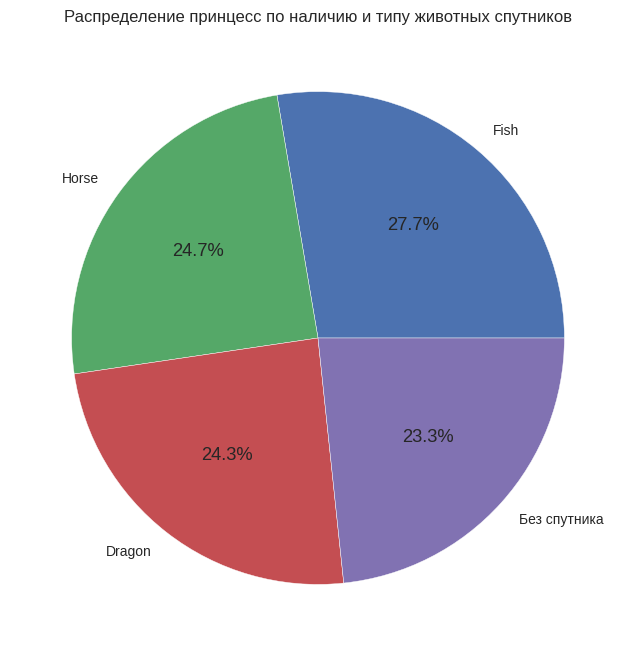

In [161]:
sidekick_labels = df['SidekickType'].fillna('Без спутника')  #NaN = нет спутника
sidekick_counts = sidekick_labels.value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    sidekick_counts,
    labels=sidekick_counts.index,
    autopct='%1.1f%%'
)
plt.title('Распределение принцесс по наличию и типу животных спутников')
plt.show()

##10. Stacked bar: Наличие магии и животных спутников
Показывает, сколько принцесс с магическими силами имеют животных спутников и сколько нет.

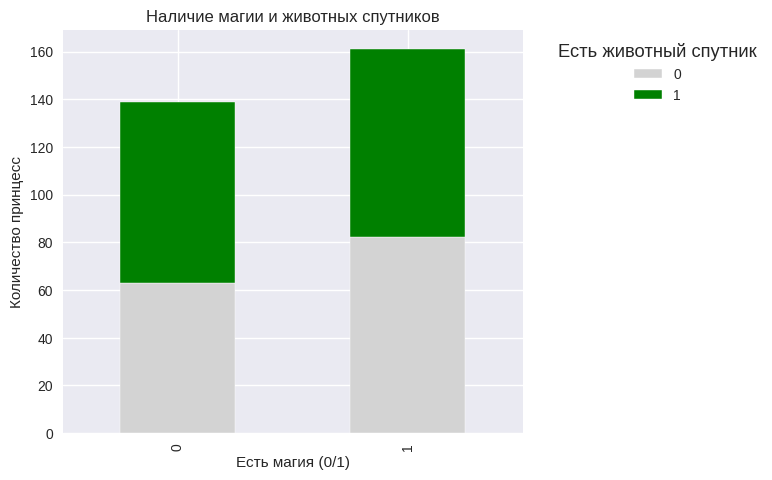

In [181]:
cross_tab = pd.crosstab(df['HasMagicalPowers'], df['HasAnimalSidekick'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8,5), color=['lightgrey', 'green'])
plt.title('Наличие магии и животных спутников')
plt.xlabel('Есть магия (0/1)')
plt.ylabel('Количество принцесс')
plt.legend(title='Есть животный спутник', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##11. Barplot: топ хэштегов
Показать, какие хэштеги наиболее популярны среди принцесс, и сравнить их количество.

/tmp/ipython-input-973853197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='muted')


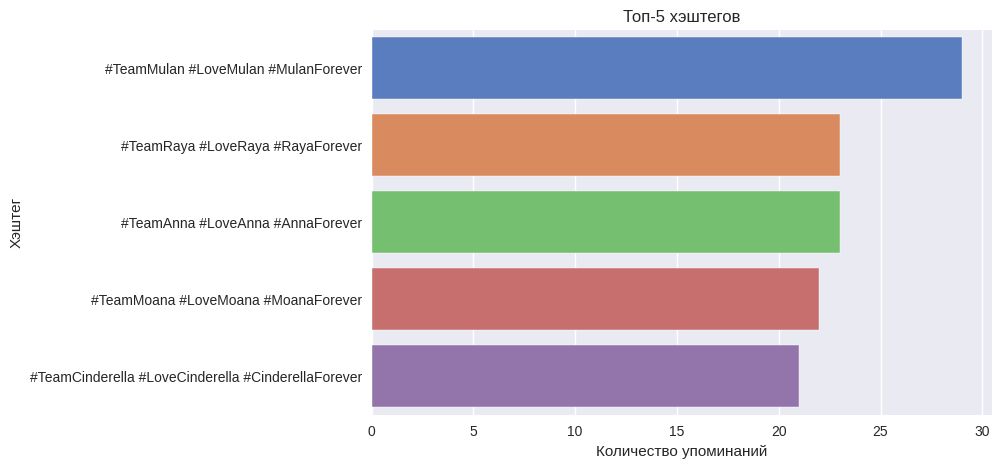

In [191]:
top_hashtags = df['Top3Hashtags'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='muted')
plt.title('Топ-5 хэштегов')
plt.xlabel('Количество упоминаний')
plt.ylabel('Хэштег')
plt.show()